In [8]:
import torch
import numpy as np
import matplotlib.pylab as plt
from IPython.display import clear_output
import torch.nn as nn 
import torch.optim as optim

import antidistil
import pipeline
import consts
from importlib import reload
import plot
import json
reload(plot)
reload(antidistil)
reload(pipeline)
reload(consts)
plot.prepare_for_plots()

Using cuda device


<Figure size 864x720 with 0 Axes>

In [9]:
train_dataloader, test_dataloader = pipeline.get_data()

In [10]:
history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

for i in range(consts.num_repeats):
    clear_output()
    print(f"Model {i+1}\n-------------------------------"
                      "\n-------------------------------")

    torch.manual_seed(i)

    teacher = pipeline.make_teacher_model()
    teacher.load_state_dict(torch.load(pipeline.get_path()+f'/teacher_5cl_{i}.pt'))
    model = antidistil.make_student_model()

    mask = torch.tensor([1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=torch.float).to(consts.device)
    
    loss_fn = antidistil.altidistill_loss
    optimizer = optim.Adam(model.parameters(), lr=consts.student_5_antidistil_learning_rate)
    scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.85)

    lambdas = [1, 0, 1, 0]
    
    for epoch in range(consts.student_5_antidistil_epochs):
        print(f"Epoch {epoch+1}\n-------------------------------")

        pipeline.antidistil_loop(teacher, model, lambdas, mask, train_dataloader, 
                                 loss_fn, optimizer, scheduler, noise_dist='uniform', noise_eps=1e-1)

    optimizer = optim.Adam(model.parameters(), lr=consts.student_5_learning_rate)    

    mask = torch.ones(10).to(consts.device)

    loss_fn = nn.CrossEntropyLoss()

    for epoch in range(consts.student_5_training_epochs):
        print(f"Epoch {epoch+1}\n-------------------------------")

        pipeline.train_loop(model, history, mask, train_dataloader, loss_fn, optimizer)
        pipeline.test_loop(model, history, mask, test_dataloader, loss_fn)

    pipeline.test_loop_fsgm(model, history, mask, test_dataloader, loss_fn, consts.fsgm_eps)
    pipeline.test_loop_noise(model, history, mask, test_dataloader, consts.noise_eps)
    torch.save(model.state_dict(), pipeline.get_path()+f'/lambdas_sched_{i}.pt')

Model 10
-------------------------------
-------------------------------
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1
-------------------------------


Train Loss: 1.7287098625872999
Train Acc: 0.7156666666666667
Epoch 2
-------------------------------


Train Loss: 1.4876464478513027
Train Acc: 0.7452
Epoch 3
-------------------------------


Train Loss: 1.4277677333101313
Train Acc: 0.7530333333333333
Epoch 4
-------------------------------


Train Loss: 1.3836384293880868
Train Acc: 0.7577
Epoch 5
-------------------------------


Train Loss: 1.3568551116801322
Train Acc: 0.7606
Epoch 6
-------------------------------


Train Loss: 1.32813413929432
Train Acc: 0.7631
Epoch 7
-------------------------------


Train Loss: 1.3009867741706524
Train Acc: 0.7663333333333333
Epoch 8
-------------------------------


Train Loss: 1.2819039902788527
Train Acc: 0.7677
Epoch 9
-------------------------------


Train Loss: 1.2702526901630644
Train Acc: 0.7688333333333334
Epoch 10
-------------------------------


Train Loss: 1.2553702164203562
Train Acc: 0.7708333333333334
Epoch 11
-------------------------------


Train Loss: 1.2435281157493592
Train Acc: 0.772
Epoch 12
-------------------------------


Train Loss: 1.2290680205568354
Train Acc: 0.7726333333333333
Epoch 13
-------------------------------


Train Loss: 1.2164459208224683
Train Acc: 0.7737333333333334
Epoch 14
-------------------------------


Train Loss: 1.2059683231597251
Train Acc: 0.7754333333333333
Epoch 15
-------------------------------


Train Loss: 1.1948063312692845
Train Acc: 0.7767
Epoch 1
-------------------------------


Validation accuracy: 78.8%, Validation loss: 0.616809 

Epoch 2
-------------------------------


Validation accuracy: 80.0%, Validation loss: 0.575898 

Epoch 3
-------------------------------


Validation accuracy: 80.3%, Validation loss: 0.563470 

Epoch 4
-------------------------------


Validation accuracy: 80.6%, Validation loss: 0.560916 

Epoch 5
-------------------------------


Validation accuracy: 80.8%, Validation loss: 0.554388 

Epoch 6
-------------------------------


Validation accuracy: 81.0%, Validation loss: 0.550916 

Epoch 7
-------------------------------


Validation accuracy: 81.3%, Validation loss: 0.548938 

Epoch 8
-------------------------------


Validation accuracy: 81.5%, Validation loss: 0.544764 

Epoch 9
-------------------------------


Validation accuracy: 81.6%, Validation loss: 0.546894 

Epoch 10
-------------------------------


Validation accuracy: 81.3%, Validation loss: 0.555591 

Epoch 11
-------------------------------


Validation accuracy: 81.4%, Validation loss: 0.559137 

Epoch 12
-------------------------------


Validation accuracy: 81.6%, Validation loss: 0.565812 

Epoch 13
-------------------------------


Validation accuracy: 81.5%, Validation loss: 0.573194 

Epoch 14
-------------------------------


Validation accuracy: 81.6%, Validation loss: 0.581845 

Epoch 15
-------------------------------


Validation accuracy: 81.5%, Validation loss: 0.598698 

Epoch 16
-------------------------------


Validation accuracy: 81.5%, Validation loss: 0.598095 

Epoch 17
-------------------------------


Validation accuracy: 81.8%, Validation loss: 0.600928 

Epoch 18
-------------------------------


Validation accuracy: 81.8%, Validation loss: 0.598499 

Epoch 19
-------------------------------


Validation accuracy: 81.8%, Validation loss: 0.609263 

Epoch 20
-------------------------------


Validation accuracy: 81.8%, Validation loss: 0.609807 

Epoch 21
-------------------------------


Validation accuracy: 81.9%, Validation loss: 0.606242 

Epoch 22
-------------------------------


Validation accuracy: 81.4%, Validation loss: 0.626763 

Epoch 23
-------------------------------


Validation accuracy: 81.9%, Validation loss: 0.615862 

Epoch 24
-------------------------------


Validation accuracy: 81.6%, Validation loss: 0.638065 

Epoch 25
-------------------------------


Validation accuracy: 81.4%, Validation loss: 0.655376 

Epoch 26
-------------------------------


Validation accuracy: 81.1%, Validation loss: 0.664151 

Epoch 27
-------------------------------


Validation accuracy: 81.6%, Validation loss: 0.670071 

Epoch 28
-------------------------------


Validation accuracy: 82.0%, Validation loss: 0.680314 

Epoch 29
-------------------------------


Validation accuracy: 81.7%, Validation loss: 0.669872 

Epoch 30
-------------------------------


Validation accuracy: 81.4%, Validation loss: 0.683829 



FSGM Accuracy [0.8144, 0.7874, 0.7536, 0.7162, 0.6798, 0.646, 0.6099, 0.5763, 0.5441, 0.5177]


Noise Accuracy [0.8144, 0.8128, 0.8102, 0.8018, 0.7904, 0.7813, 0.7708, 0.758, 0.7318, 0.706]
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


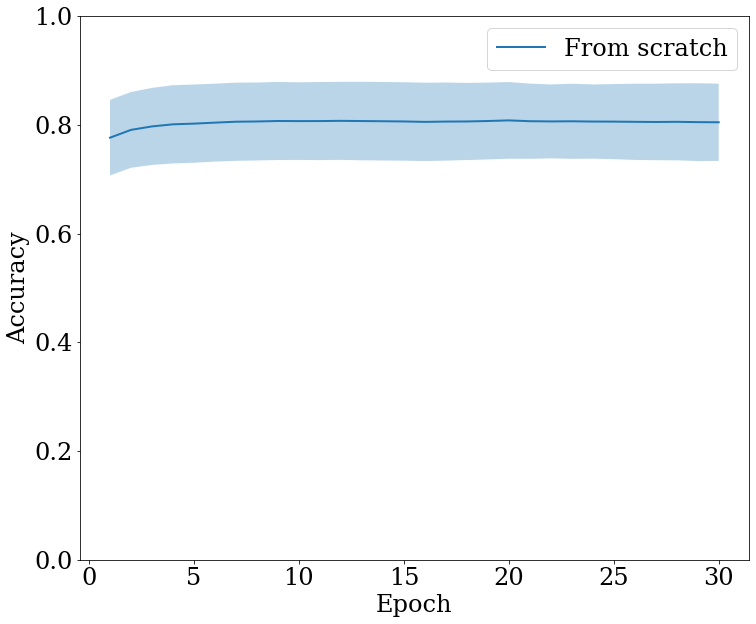

In [11]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], np.arange(1, consts.student_5_training_epochs + 1),
                   ['From scratch'], 'val_acc', 
                    'Epoch', 'Accuracy')

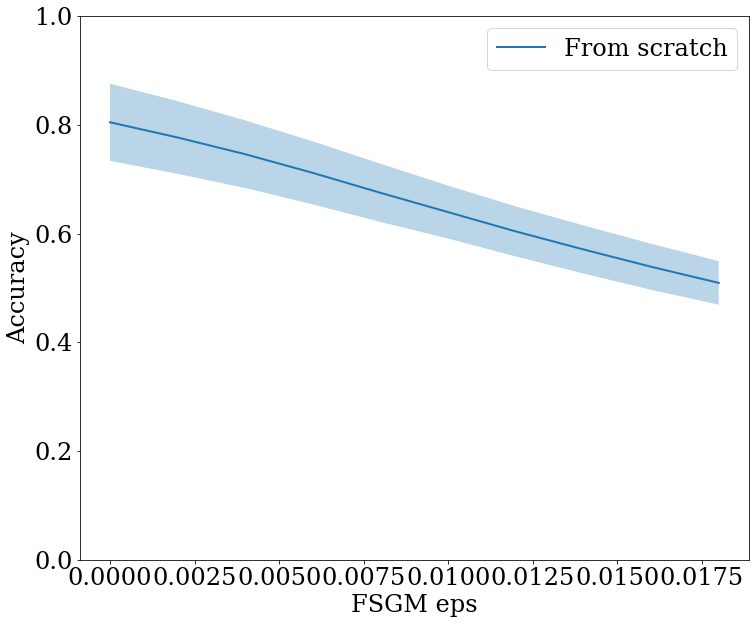

In [12]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], consts.fsgm_eps,
                   ['From scratch'], 'fsgm_noise_acc', 
                    'FSGM eps', 'Accuracy')

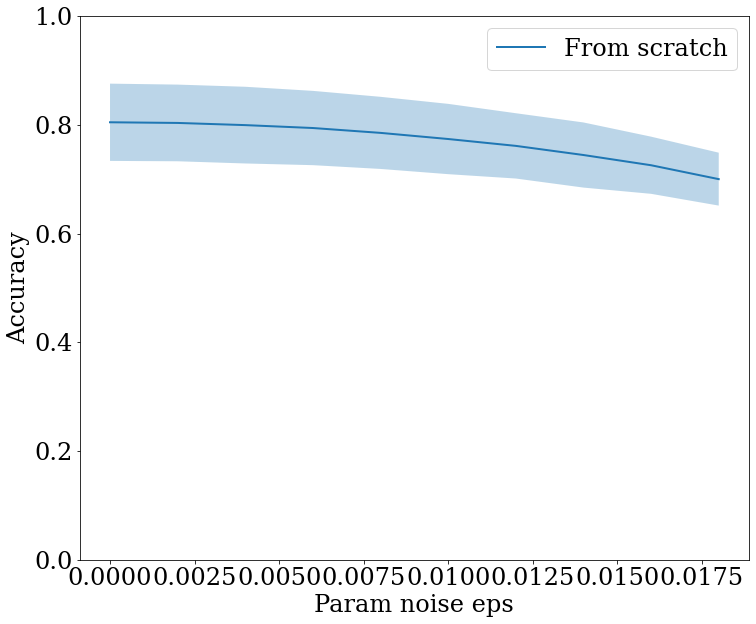

In [13]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], consts.fsgm_eps,
                   ['From scratch'], 'param_noise_acc', 
                    'Param noise eps', 'Accuracy')

In [14]:
with open(pipeline.get_path()+'/history_l1_l3.json', 'w') as out:
    out.write(json.dumps(history))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
